In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('Churn_Modelling.csv')

In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
pip install tensorflow-gpu

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: protobuf<3.20,>=3.9.2 in e:\anaconda\lib\site-packages (from tensorflow-gpu) (3.19.4)



In [8]:
import tensorflow as tf
print(tf.__version__)

2.9.1


In [12]:
x=df.iloc[:,3:13]
y=df.iloc[:,13]

In [13]:
y


0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [14]:
x

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


In [17]:
 ## feature engineering
geography=pd.get_dummies(x['Geography'],drop_first=True)
gender=pd.get_dummies(x['Gender'],drop_first=True)

In [18]:
## concatenate these variables with dataframe
x=x.drop(['Geography','Gender'],axis=1)

In [19]:
pd.concat([x,geography,gender],axis=1)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1


In [20]:
#splitting the dataset intlo trainng and testing set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [22]:
#feature scaling

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [23]:
x_train

array([[ 0.16958176, -0.46460796,  0.00666099, ...,  0.64259497,
        -1.03227043,  1.10643166],
       [-2.30455945,  0.30102557, -1.37744033, ...,  0.64259497,
         0.9687384 , -0.74866447],
       [-1.19119591, -0.94312892, -1.031415  , ...,  0.64259497,
        -1.03227043,  1.48533467],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ...,  0.64259497,
        -1.03227043,  1.41231994],
       [-0.62420521, -0.08179119,  1.39076231, ...,  0.64259497,
         0.9687384 ,  0.84432121],
       [-0.28401079,  0.87525072, -1.37744033, ...,  0.64259497,
        -1.03227043,  0.32472465]])

In [27]:
## lets create ANN
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU
from tensorflow.keras.layers import Dropout

In [28]:
# lets initialize the ANN

classifier=Sequential()

In [29]:
## adding the input layer
classifier.add(Dense(units=11,activation='relu'))

In [30]:
# adding the first hidden layer
classifier.add(Dense(units=7,activation='relu'))


In [31]:
## adding the second hidden layer 
classifier.add(Dense(units=6,activation='relu'))

In [34]:
##adding the ouput layer
classifier.add(Dense(1,activation='sigmoid'))

In [35]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [37]:
#early stopping
import tensorflow as tf
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)

In [52]:
model_history=classifier.fit(x_train,y_train,validation_split=0.33,batch_size=10,epochs=100,callbacks=early_stopping)

Epoch 1/100
536/536 [==============================] - 1s 1ms/step - loss: 0.3256 - accuracy: 0.8628 - val_loss: 0.3911 - val_accuracy: 0.8485
Epoch 2/100
536/536 [==============================] - 1s 982us/step - loss: 0.3262 - accuracy: 0.8627 - val_loss: 0.3861 - val_accuracy: 0.8451
Epoch 3/100
536/536 [==============================] - 1s 983us/step - loss: 0.3267 - accuracy: 0.8628 - val_loss: 0.3897 - val_accuracy: 0.8482
Epoch 4/100
536/536 [==============================] - 1s 1ms/step - loss: 0.3267 - accuracy: 0.8628 - val_loss: 0.3914 - val_accuracy: 0.8444
Epoch 5/100
536/536 [==============================] - 1s 981us/step - loss: 0.3265 - accuracy: 0.8647 - val_loss: 0.3900 - val_accuracy: 0.8436
Epoch 6/100
536/536 [==============================] - 1s 1ms/step - loss: 0.3272 - accuracy: 0.8636 - val_loss: 0.3864 - val_accuracy: 0.8448
Epoch 7/100
536/536 [==============================] - 1s 967us/step - loss: 0.3271 - accuracy: 0.8656 - val_loss: 0.3873 - val_accuracy

In [53]:
model_history.history.keys() 


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

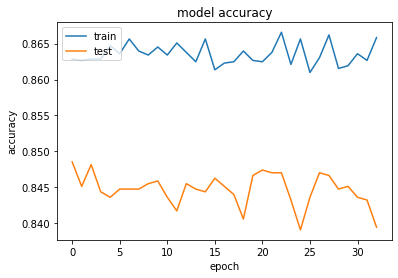

In [54]:
## summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

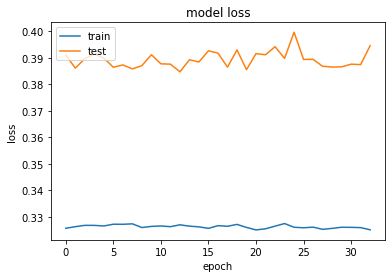

In [55]:
## summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [56]:
# making the predictions and evaluating the model

#predicting the test set results
y_pred=classifier.predict(x_test)
y_pred=(y_pred>=0.5)

63/63 [==============================] - 2s 531us/step


In [57]:
# make the confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[1479,  116],
       [ 199,  206]], dtype=int64)

In [58]:
# calculate the accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)
score

0.8425

In [59]:
classifier.get_weights()

[array([[ 0.03771586, -0.27938098,  0.26293448,  0.03074976, -0.11215244,
          0.062059  ,  0.2773842 ,  0.22121759, -0.03067374,  0.38785997,
         -0.16897887],
        [-1.1769502 , -0.9041384 , -0.3846795 ,  0.07496805,  0.16504991,
         -0.31867665, -0.81934994, -1.0203668 , -0.10343174,  0.39981857,
         -0.926805  ],
        [ 0.04243864, -0.04039603, -0.41268873, -0.02721715,  0.65958554,
         -0.06184124,  0.05751844,  0.21726419,  0.12817928, -0.0481067 ,
         -0.2890439 ],
        [-0.0200185 , -0.04581611,  0.01058027,  0.03263827, -1.2138151 ,
         -0.03155049, -0.15352835, -0.4536585 , -0.51670414, -0.83779347,
          0.2964093 ],
        [-0.19253725,  0.0833308 , -0.42885953,  1.1377612 , -0.17485902,
         -1.2849505 ,  0.2907351 , -0.3375635 , -0.95278686,  0.7694339 ,
         -0.01944618],
        [-0.22263868, -0.65776336,  0.27884465, -0.26919436, -0.26847032,
         -0.08004712,  0.21873526, -0.089565  , -0.19462456, -0.5376564